Author : Clara Martinez

**Data Analysis : Week2/D-4**

*Daily Challenge*

Import Librairies

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Dataset

In [87]:
df = pd.read_csv("datascience_salaries.csv")

Data Exploration

In [88]:
df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [61]:
df.describe()

,Unnamed: 0,salary,salary_normalized
count,1171.000000,1171.000000,1171.000000
mean,931.620837,64836.037575,0.175940
std,647.445266,32551.767046,0.164403
min,0.000000,30000.000000,0.000000
25%,364.500000,45000.000000,0.075758
50%,815.000000,63000.000000,0.166667
75%,1504.500000,68000.000000,0.191919
max,2259.000000,228000.000000,1.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


One Hot Encoding

In [92]:
!pip install category-encoders


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [93]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [94]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Appliquer le Label Encoding à chaque colonne catégorielle
df['job_title'] = label_encoder.fit_transform(df['job_title'])
df['job_type'] = label_encoder.fit_transform(df['job_type'])
df['experience_level'] = label_encoder.fit_transform(df['experience_level'])
df['location'] = label_encoder.fit_transform(df['location'])
df['salary_currency'] = label_encoder.fit_transform(df['salary_currency'])


df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,2,0,3,179,2,149000
1,2,2,0,3,34,2,120000
2,3,2,0,3,136,2,68000
3,4,2,0,3,34,2,120000
4,5,2,0,3,179,2,149000


In [96]:
df.drop(columns=['Unnamed: 0'])

,job_title,job_type,experience_level,location,salary_currency,salary,salary_normalized
0,2,0,3,179,2,149000,0.601010
1,2,0,3,34,2,120000,0.454545
2,2,0,3,136,2,68000,0.191919
3,2,0,3,34,2,120000,0.454545
4,2,0,3,179,2,149000,0.601010
...,...,...,...,...,...,...,...
1166,3,0,3,282,2,228000,1.000000
1167,3,0,3,34,2,115000,0.429293
1168,3,0,3,76,2,76000,0.232323
1169,3,0,3,248,2,68000,0.191919


Min-Max normalization

In [97]:
scaler = MinMaxScaler()
df['salary_normalized'] = scaler.fit_transform(df[['salary']])

PCA

In [99]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df)
df_pca = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
df = pd.concat([df, df_pca], axis=1)

Group Dataset

In [101]:
salary_stats = df.groupby('experience_level')['salary'].agg(['mean', 'median']).reset_index()
salary_stats

,experience_level,mean,median
0,0,36111.111111,30000.0
1,1,76076.923077,46000.0
2,2,51786.885246,51000.0
3,3,75088.033012,68000.0


**Lesson 2**

In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt

*Basic Plots*

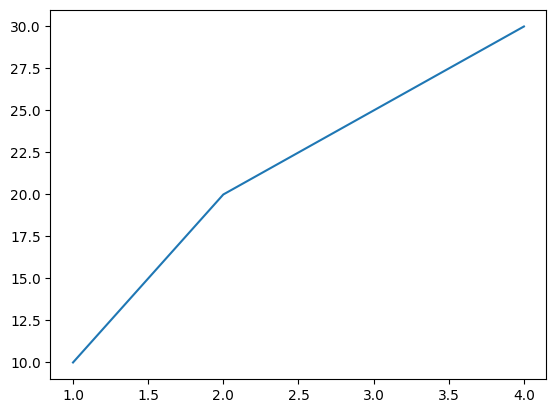

In [5]:
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

plt.plot(x, y)
plt.show()

*Customizing Line Plots*

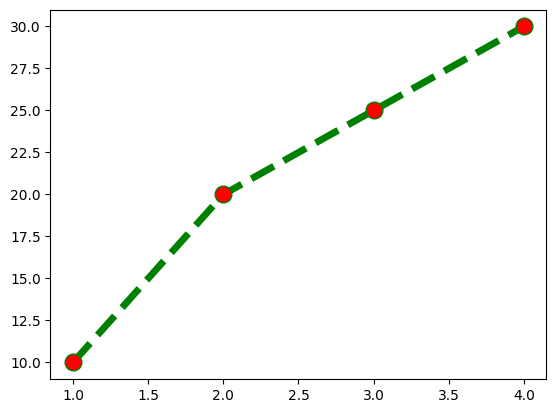

In [8]:
plt.plot(x, y, color='green', linestyle='dashed', linewidth=5, marker='o', markerfacecolor='red', markersize=12)
plt.show()

*Bar Charts*

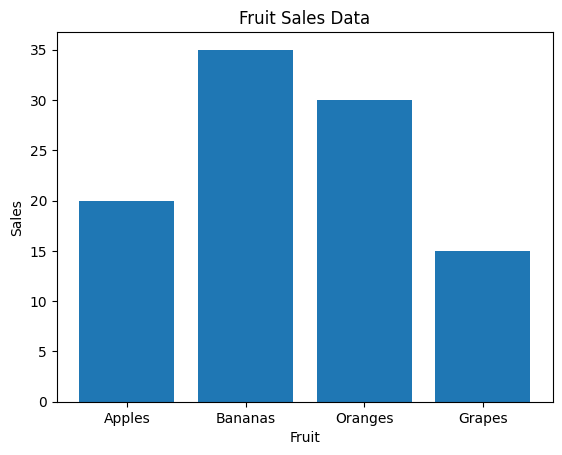

In [9]:
categories = ['Apples', 'Bananas', 'Oranges', 'Grapes']
values = [20, 35, 30, 15]

plt.bar(categories, values)
plt.title('Fruit Sales Data')
plt.xlabel('Fruit')
plt.ylabel('Sales')
plt.show()

*Customizing Bar Charts*

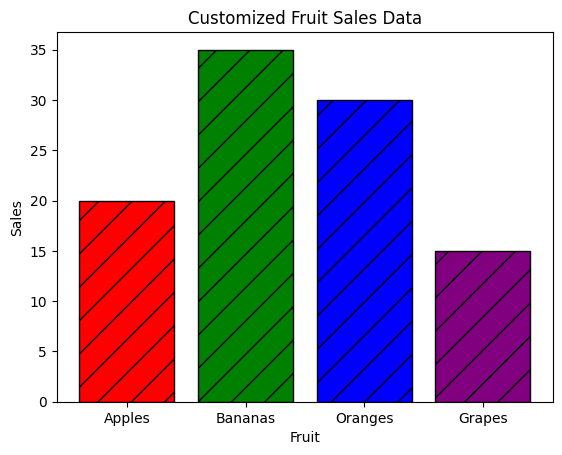

In [10]:
plt.bar(categories, values, color=['red', 'green', 'blue', 'purple'], edgecolor='black', hatch='/')
plt.title('Customized Fruit Sales Data')
plt.xlabel('Fruit')
plt.ylabel('Sales')
plt.show()

*Histograms*

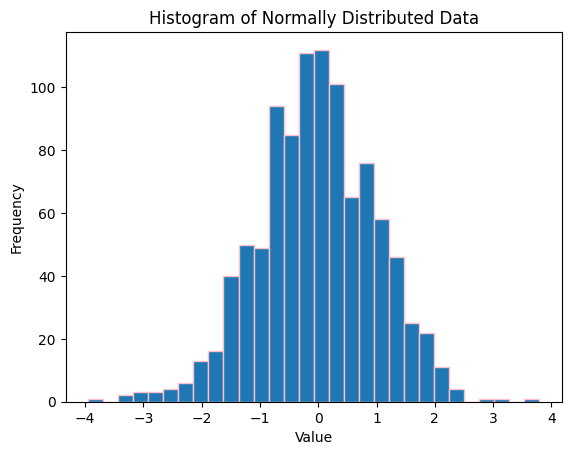

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(0, 1, 1000)
plt.hist(data, bins=30, edgecolor='pink')
plt.title("Histogram of Normally Distributed Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

*Pie Charts*

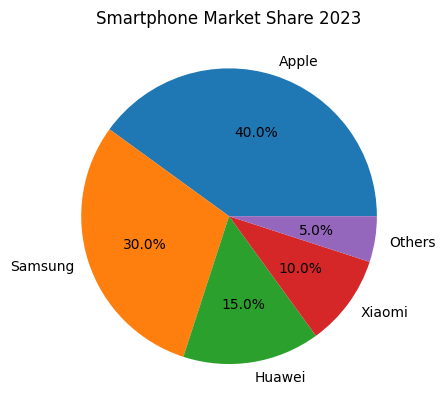

In [12]:
brands = ['Apple', 'Samsung', 'Huawei', 'Xiaomi', 'Others']
market_share = [40, 30, 15, 10, 5]

plt.pie(market_share, labels=brands, autopct='%1.1f%%')
plt.title('Smartphone Market Share 2023')
plt.show()

*Customizing Pie Charts*

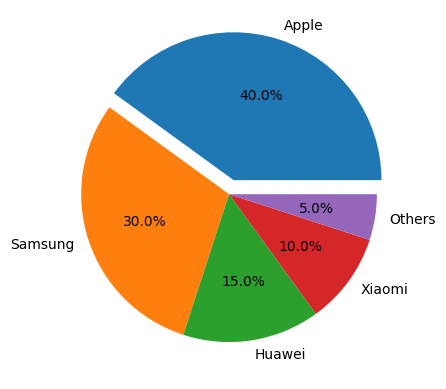

In [13]:
explode = (0.1, 0, 0, 0, 0)
plt.pie(market_share, labels=brands, autopct='%1.1f%%', explode=explode)
plt.show()

*Box plots*

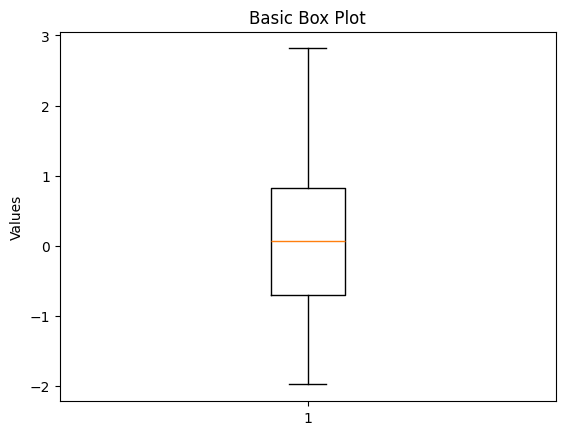

In [14]:
import numpy as np

data = np.random.randn(100)
plt.boxplot(data)
plt.title('Basic Box Plot')
plt.ylabel('Values')
plt.show()

*Subplots*

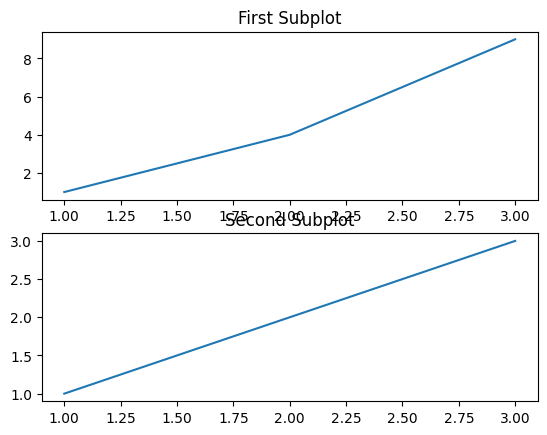

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot([1, 2, 3], [1, 4, 9])
ax1.set_title('First Subplot')
ax2.plot([1, 2, 3], [1, 2, 3])
ax2.set_title('Second Subplot')
plt.show()

**Hands on Exercices**

Line Plot

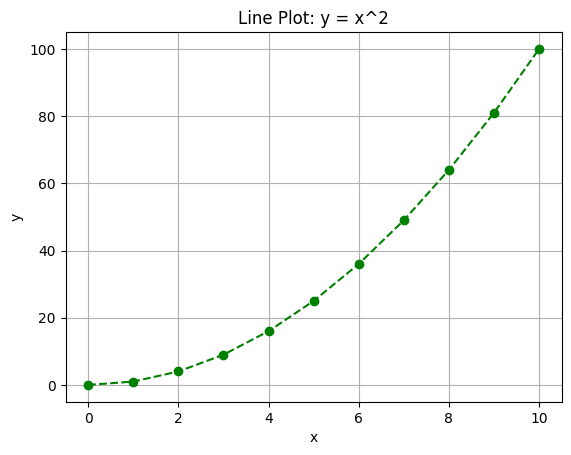

In [16]:
x = range(0, 11)
y = [i**2 for i in x]
plt.plot(x, y, color='green', linestyle='--', marker='o')
plt.title("Line Plot: y = x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

*Bar Chart*

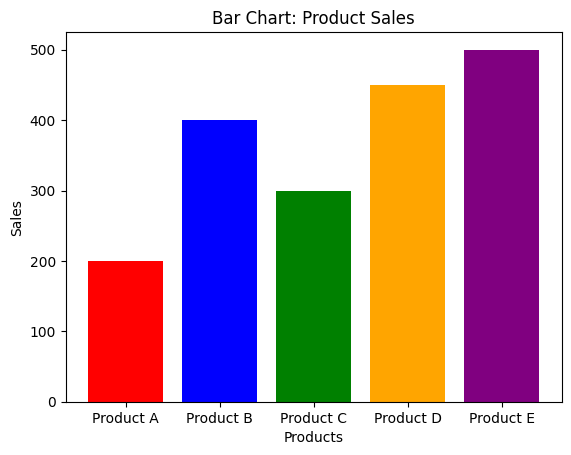

In [17]:
products = ["Product A", "Product B", "Product C", "Product D", "Product E"]
sales = [200, 400, 300, 450, 500]
plt.bar(products, sales, color=['red', 'blue', 'green', 'orange', 'purple'])
plt.title("Bar Chart: Product Sales")
plt.xlabel("Products")
plt.ylabel("Sales")
plt.show()

Histogram

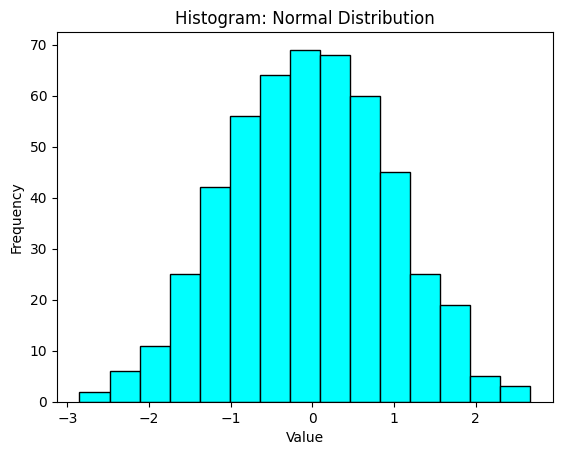

In [18]:
data = np.random.normal(0, 1, 500)
plt.hist(data, bins=15, color='cyan', edgecolor='black')
plt.title("Histogram: Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

np.random.normal() : C'est une fonction qui génère des nombres aléatoires selon une distribution normale (ou gaussienne).

0 : C'est la moyenne (ou espérance) de la distribution. Dans ce cas, la moyenne est 0, ce qui signifie que la distribution est centrée autour de 0.

1 : C'est l'écart-type de la distribution. Un écart-type de 1 signifie que la dispersion des valeurs autour de la moyenne est relativement standard. En d'autres termes, environ 68 % des valeurs générées seront comprises entre -1 et 1 (une fois l'écart-type ajouté et soustrait à la moyenne).

500 : C'est le nombre de valeurs aléatoires à générer. Ici, 500 valeurs seront créées.

L'axe horizontal (x) représente les valeurs des données. Dans ce cas, il s'agit des valeurs générées par np.random.normal(0, 1, 500).
L'axe vertical (y) représente la fréquence, c'est-à-dire le nombre de valeurs qui tombent dans chaque intervalle (ou "bin").

Pie Chart

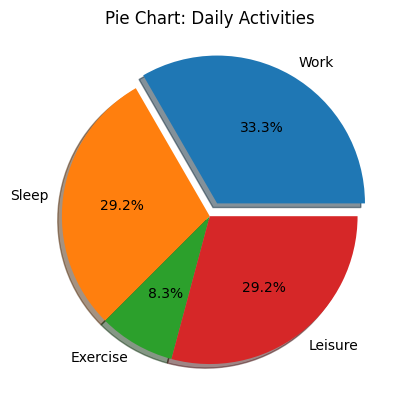

In [19]:
activities = ['Work', 'Sleep', 'Exercise', 'Leisure']
time_spent = [8, 7, 2, 7]
explode = (0.1, 0, 0, 0)
plt.pie(time_spent, labels=activities, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title("Pie Chart: Daily Activities")
plt.show()

**Lesson 3**

https://seaborn.pydata.org/tutorial.html

In [ ]:
#!pip install seaborn

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

*Histogram*

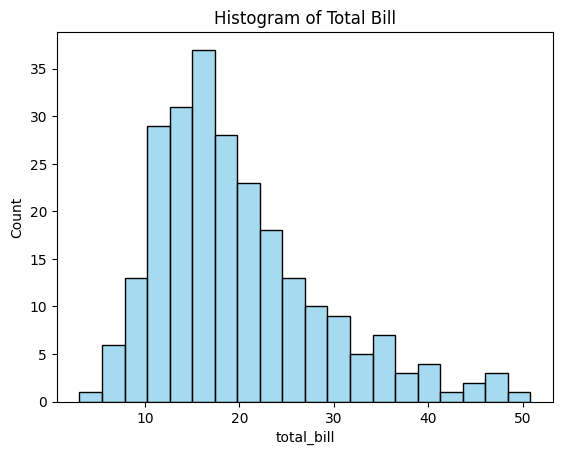

In [22]:
# Load sample data
data = sns.load_dataset('tips')
sns.histplot(data['total_bill'], bins=20, color='skyblue')
plt.title('Histogram of Total Bill')
plt.show()

*Kernel Density Estimation (KDE) Plots*

C:\Users\moonb\AppData\Local\Temp\ipykernel_63968\2371921035.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['total_bill'],shade=True, color='red')


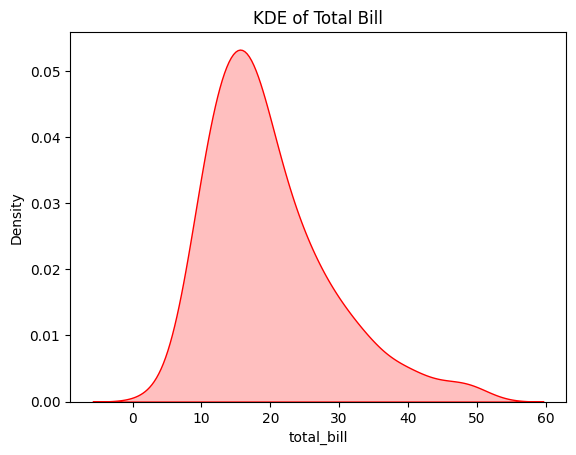

In [29]:
sns.kdeplot(data['total_bill'],shade=True, color='red')
plt.title('KDE of Total Bill')
plt.show()

*Bivariate Distributions*

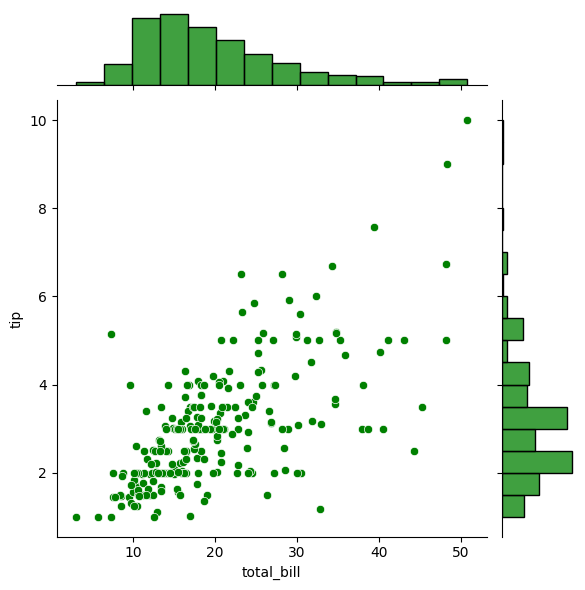

In [30]:
sns.jointplot(x='total_bill', y='tip', data=data, kind='scatter', color='green')
plt.show()

*Categorical Data Visualization*

*Bar Plots*

C:\Users\moonb\AppData\Local\Temp\ipykernel_63968\1143395905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='survived', data=titanic, palette='Blues')


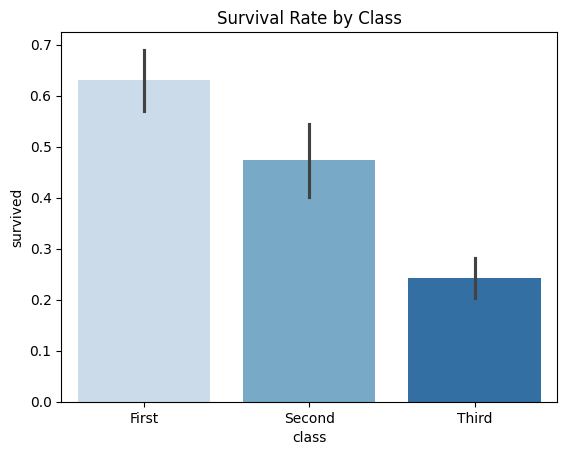

In [31]:
titanic = sns.load_dataset('titanic')
sns.barplot(x='class', y='survived', data=titanic, palette='Blues')
plt.title('Survival Rate by Class')
plt.show()

*Box Plots*

C:\Users\moonb\AppData\Local\Temp\ipykernel_63968\1651098642.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='age', data=titanic, palette='Set3')


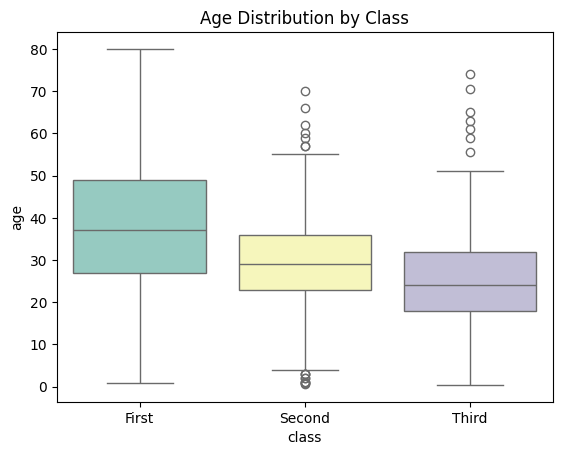

In [32]:
sns.boxplot(x='class', y='age', data=titanic, palette='Set3')
plt.title('Age Distribution by Class')
plt.show()

*Violin Plots*

C:\Users\moonb\AppData\Local\Temp\ipykernel_63968\1279526175.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y='age', data=titanic, palette='muted')


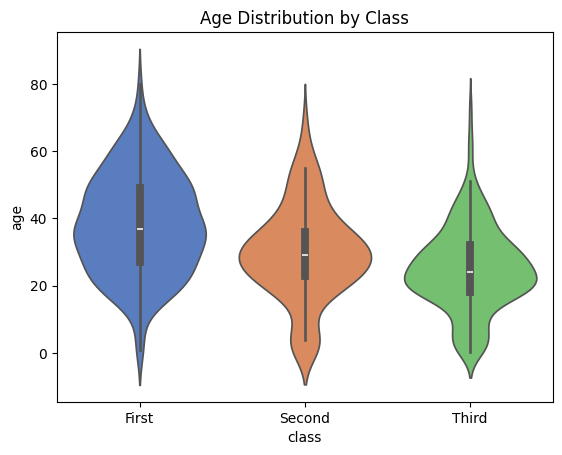

In [33]:
sns.violinplot(x='class', y='age', data=titanic, palette='muted')
plt.title('Age Distribution by Class')
plt.show()

C:\Users\moonb\AppData\Local\Temp\ipykernel_63968\166291781.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y='age', data=titanic, palette='pastel')


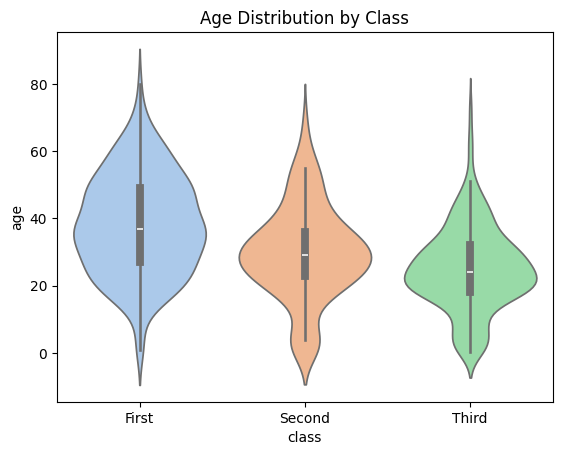

In [34]:
sns.violinplot(x='class', y='age', data=titanic, palette='pastel')
plt.title('Age Distribution by Class')
plt.show()

*Scatter Plots and Joint Plots*

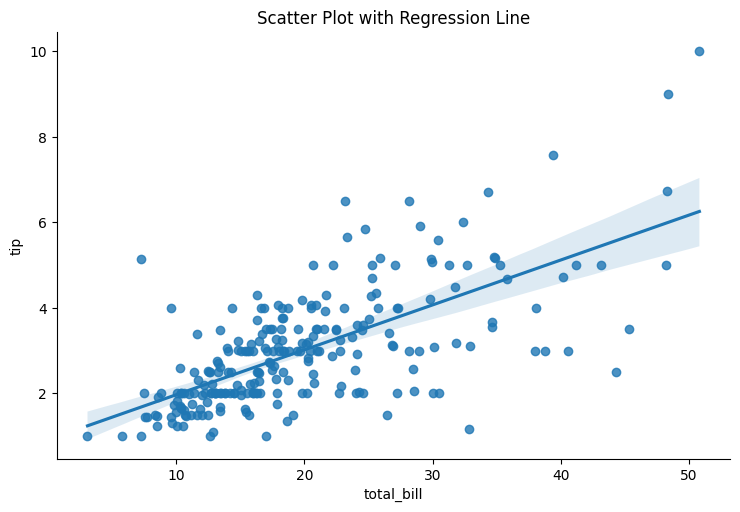

In [35]:
sns.lmplot(x='total_bill', y='tip', data=data, aspect=1.5, height=5)
plt.title('Scatter Plot with Regression Line')
plt.show()

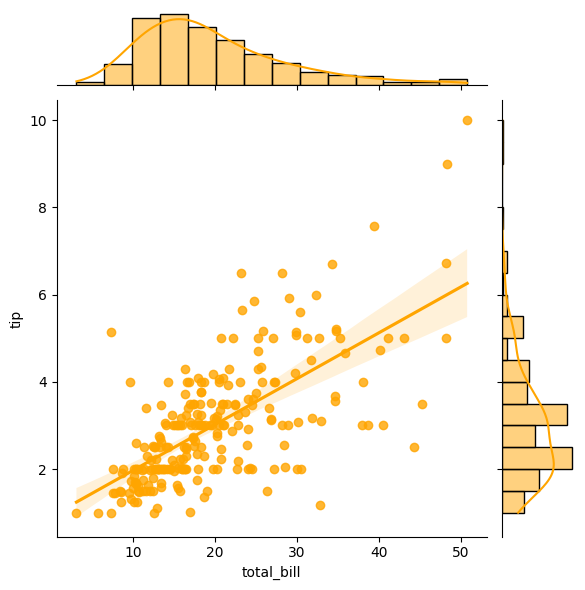

In [36]:
sns.jointplot(x='total_bill', y='tip', data=data, kind='reg', color='orange')
plt.show()

*Pair Plots*

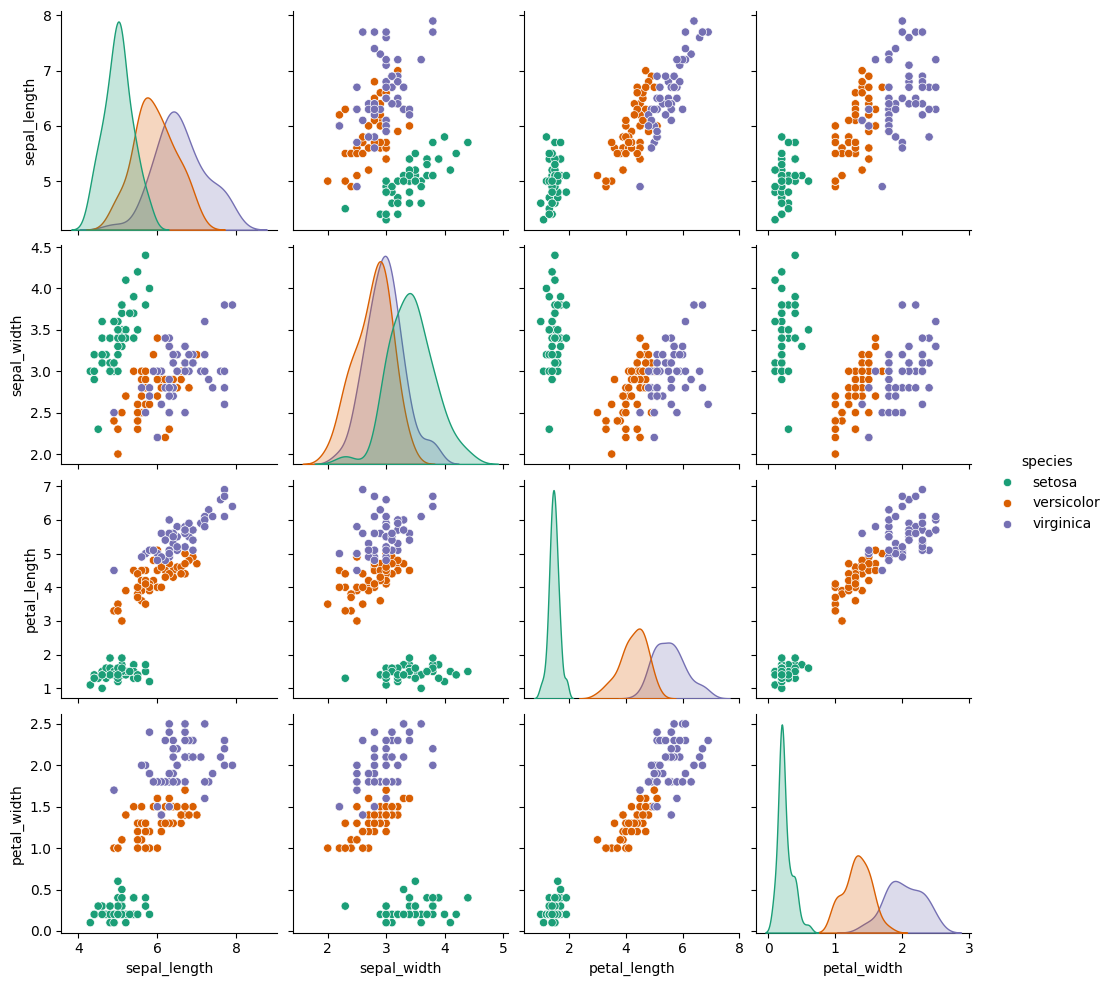

In [ ]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', palette='Dark2', )
plt.show()

*Heatmaps*

In [39]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

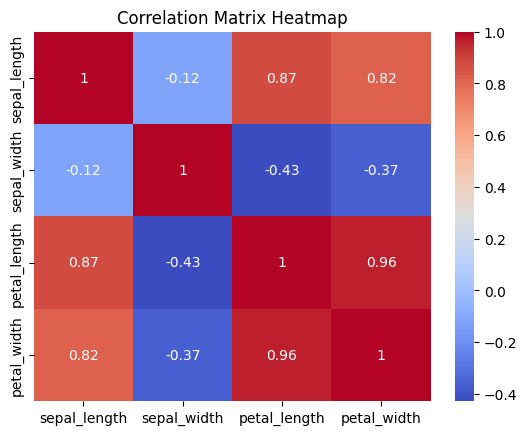

In [43]:
correlation_matrix = iris.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

*Facet Grids*

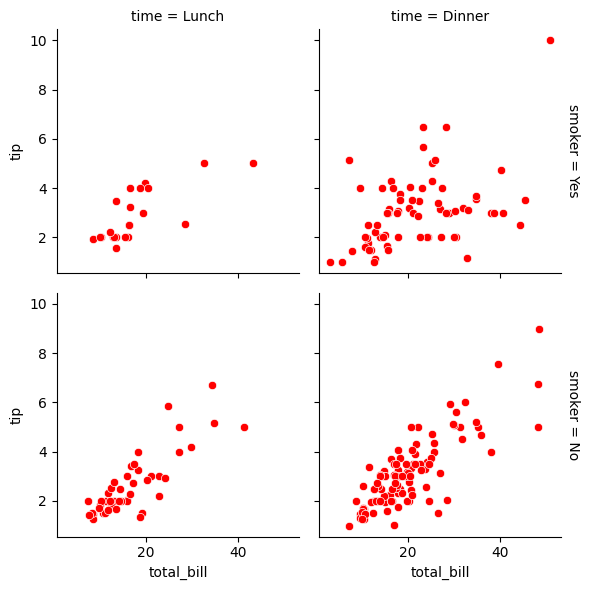

In [44]:
data = sns.load_dataset('tips')
g = sns.FacetGrid(data, col='time', row='smoker', margin_titles=True)
g.map(sns.scatterplot, 'total_bill', 'tip', color='red')
plt.show()

*Pair Grids*

C:\Users\moonb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\moonb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\moonb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\moonb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored wh

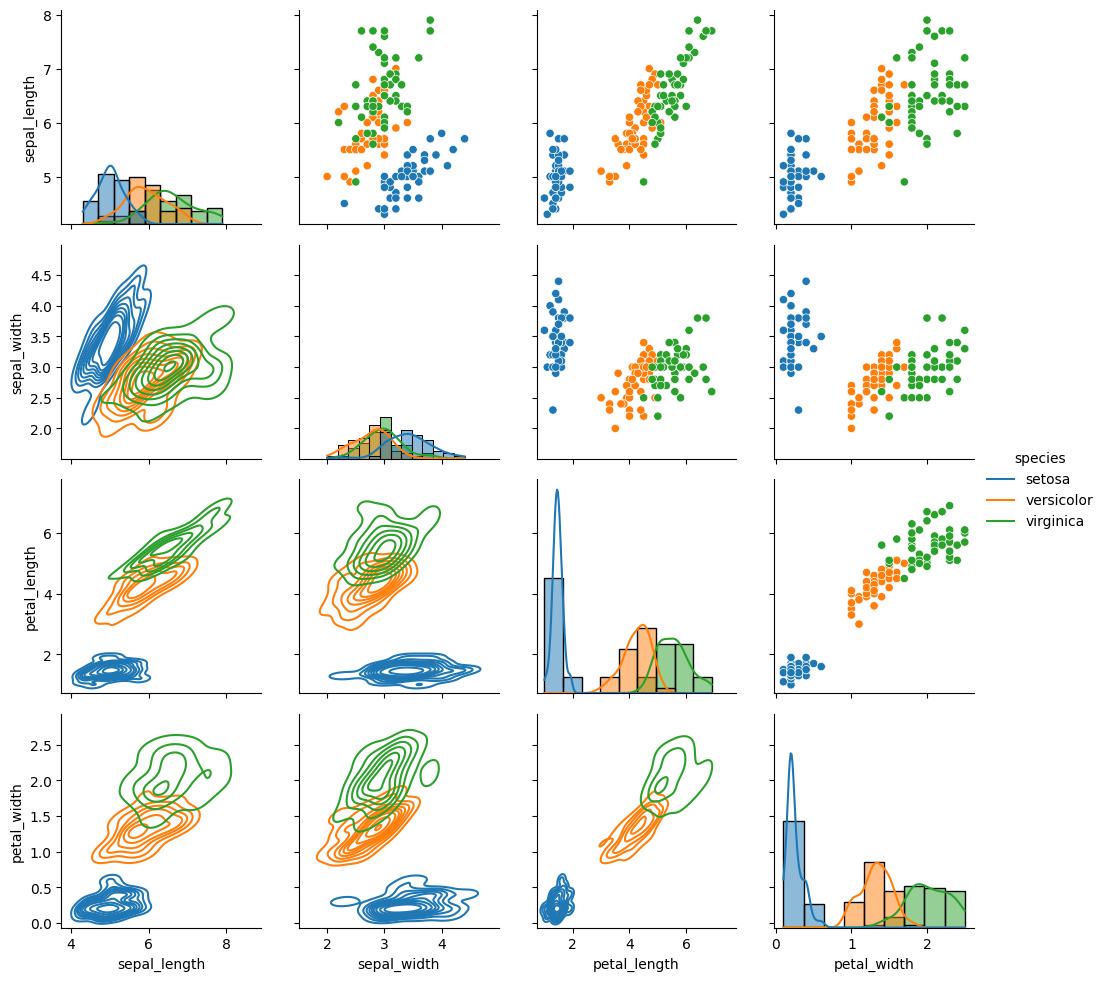

In [45]:
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris, hue='species')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap='Blues')
g.map_diag(sns.histplot, kde=True, color='teal')
g.add_legend()
plt.show()

*Adjusting Plot Aesthetics*

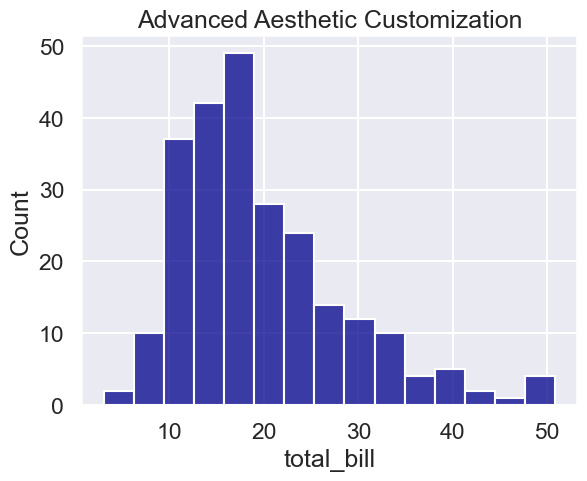

In [47]:
sns.set_context('talk')
sns.set_style('darkgrid')
sns.histplot(data['total_bill'], color='darkblue', bins=15)
plt.title('Advanced Aesthetic Customization')
plt.show()

**Exercice**

*Histograms*

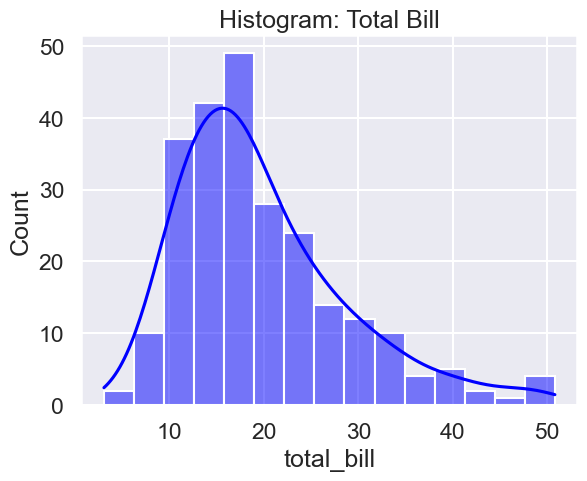

In [48]:
data = sns.load_dataset('tips')
sns.histplot(data['total_bill'], bins=15, kde=True, color='blue')
plt.title("Histogram: Total Bill")
plt.show()

*Pair plots*

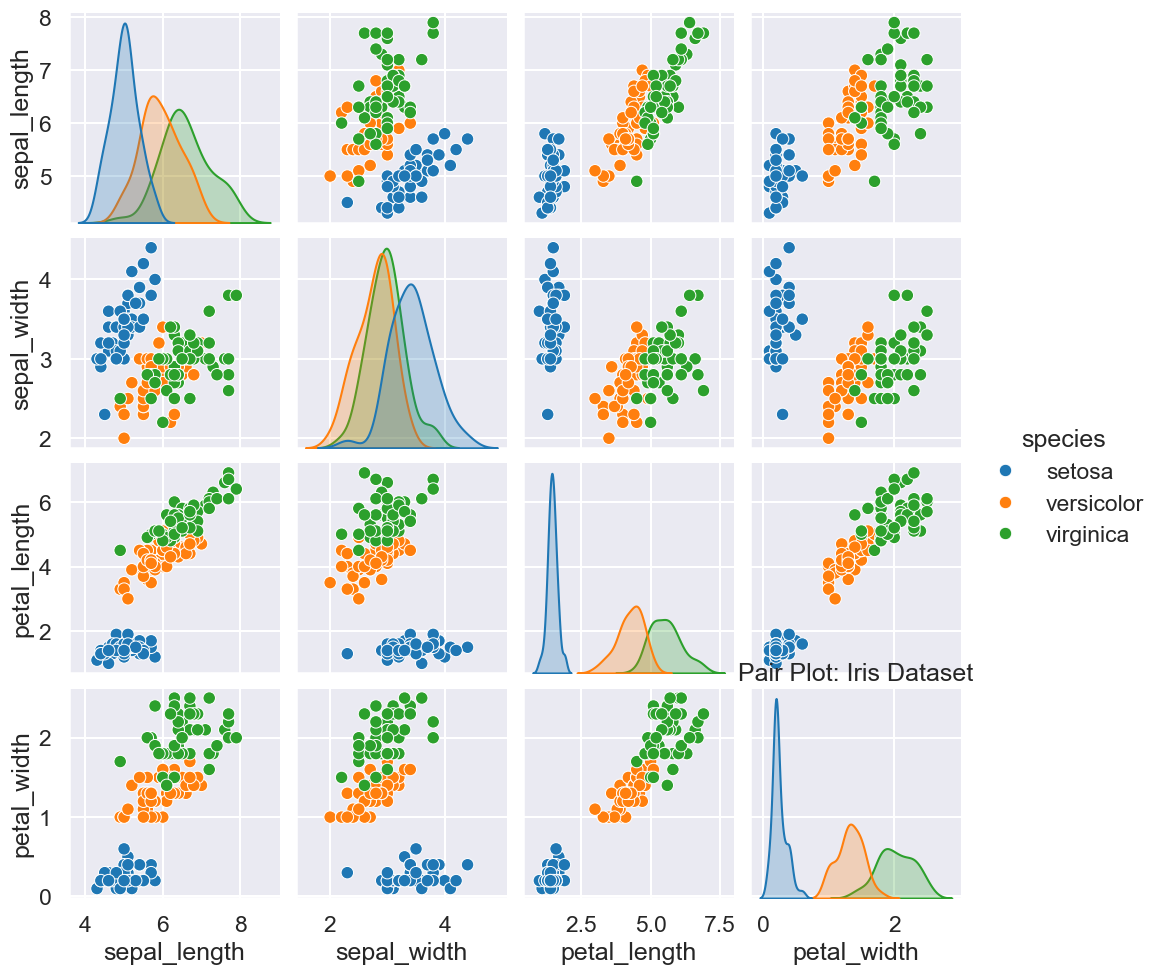

In [53]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')
plt.title("Pair Plot: Iris Dataset")
plt.show()

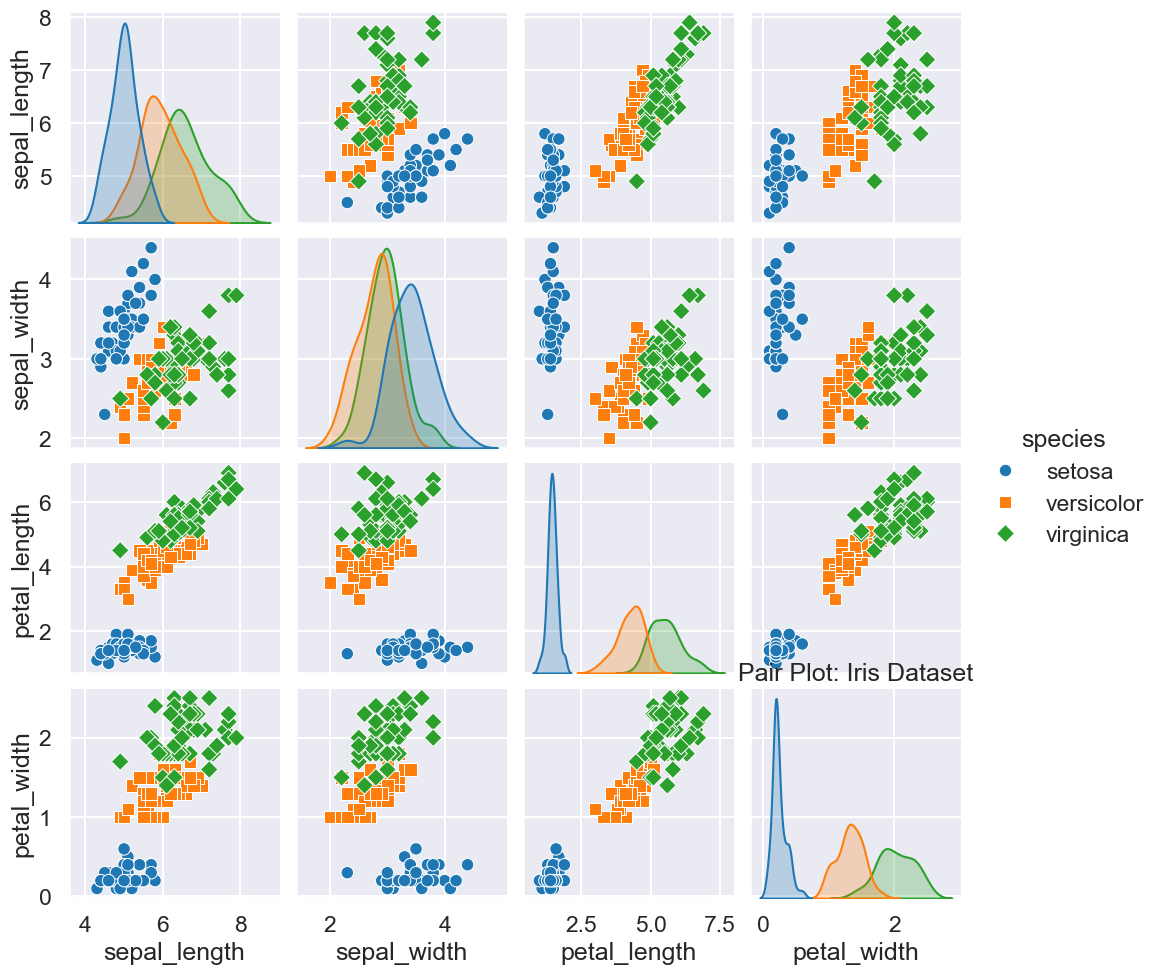

In [49]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', markers=['o', 's', 'D'])
plt.title("Pair Plot: Iris Dataset")
plt.show()

*Correlation Matrix*

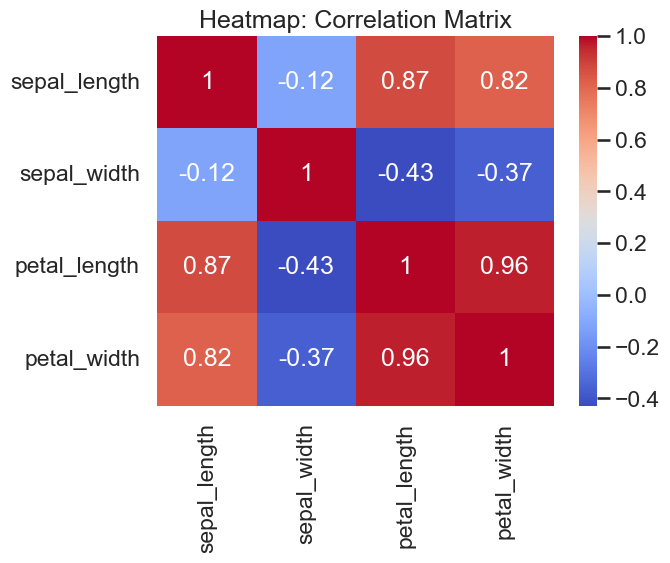

In [51]:
correlation = iris.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Heatmap: Correlation Matrix")
plt.show()

*Facet Grid for Titanic Dataset*

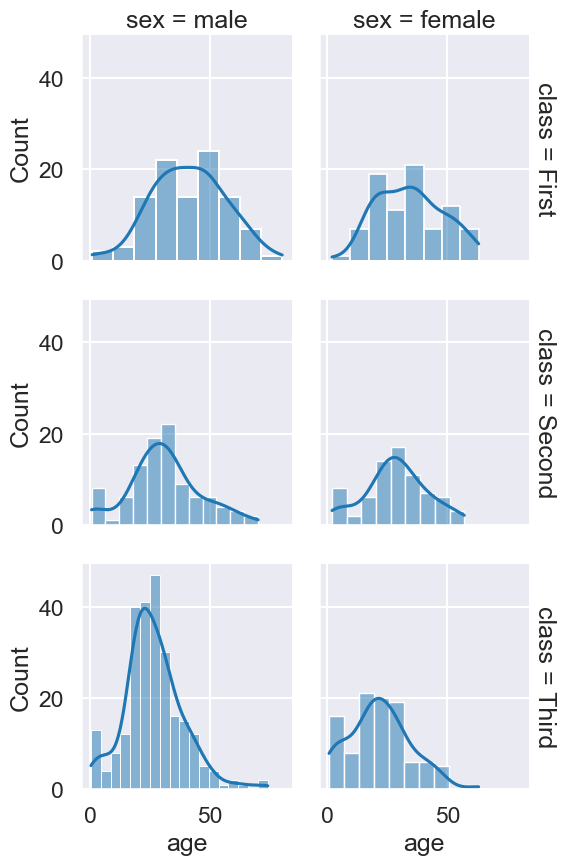

In [52]:
titanic = sns.load_dataset('titanic')
g = sns.FacetGrid(titanic, col="sex", row="class", margin_titles=True)
g.map(sns.histplot, "age", kde=True)
plt.show()